# U1T4 Redes de Natal/RN


In [2]:
!pip install osmnx==1.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.9 MB/s eta 0:00:00


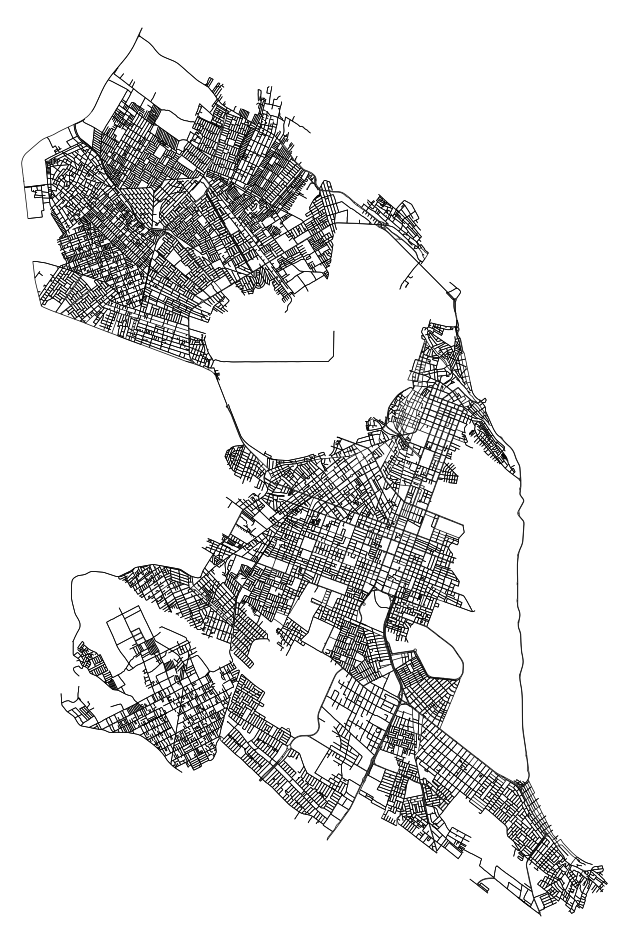

In [9]:
import osmnx as ox
import matplotlib.pyplot as plt

# Defina a cidade
cidade = "Natal, Brazil"

# Extraia a rede de ruas de Natal
G = ox.graph_from_place(cidade, network_type="drive")

# Configure as opções de visualização
fig, ax = plt.subplots(figsize=(12, 12))  # Tamanho do gráfico
ox.plot_graph(G,
               node_size=0,  # Não exibe nós
               edge_color='black',  # Cor das arestas
               edge_linewidth=0.5,  # Largura das arestas
               bgcolor='white',  # Cor de fundo clara
               ax=ax)  # Passa o eixo criado


plt.show()


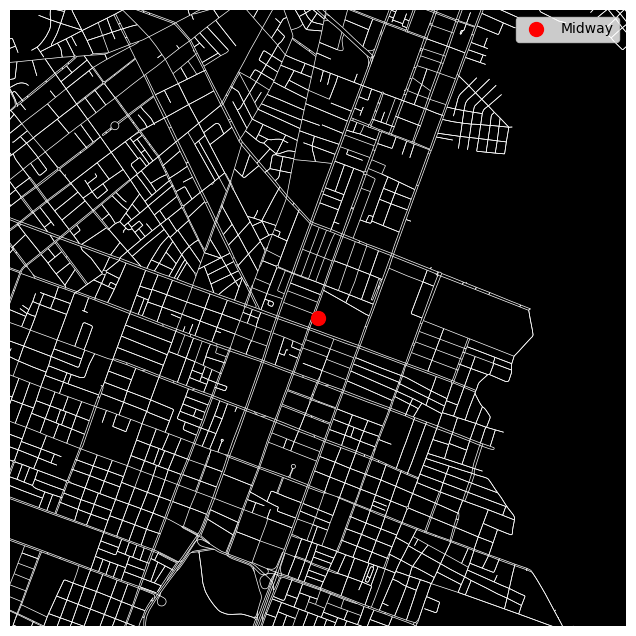

In [6]:
import osmnx as ox
import matplotlib.pyplot as plt

# Cidade
cidade = "Natal, Brazil"

# Extraia a rede de ruas de Natal
G = ox.graph_from_place(cidade, network_type="drive")

# Coordenadas do Midway
midway_coords = (-5.8111, -35.2075)

# Calcule o bounding box (área de visualização) ao redor desse ponto central
north, south, east, west = ox.utils_geo.bbox_from_point(midway_coords, dist=2000)  # Ajuste a distância conforme necessário

# Plote a rede com o bounding box (zoom)
fig, ax = ox.plot_graph(
    G,
    bbox=(north, south, east, west),  # Define a área a ser exibida
    node_size=0,                      # Ajuste o tamanho dos nós
    bgcolor='black',                  # Fundo branco para melhor contraste
    edge_color='white',               # Cor das ruas
    edge_linewidth=0.5,               # Espessura das ruas
    show=False                        # Exibe o gráfico
)
# Destacar Midway
ax.plot(midway_coords[1], midway_coords[0], 'o', color='red', markersize=10, label="Midway")

plt.legend()
plt.show()


1º Pergunta: Caminho mais rapido do Midway até a UFRN


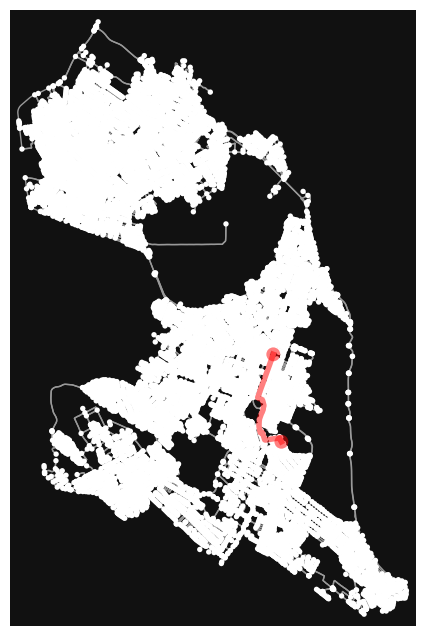

In [ ]:
import osmnx as ox
import networkx as nx

# Defina a cidade
cidade = "Natal, Brazil"
G = ox.graph_from_place(cidade, network_type="drive")

# Coordenadas do Midway e da UFRN
midway_coords = (-5.8111, -35.2075)
ufrn_coords = (-5.8394, -35.2050)

# Encontre os nós mais próximos dessas coordenadas na rede viária
midway_node = ox.nearest_nodes(G, midway_coords[1], midway_coords[0])
ufrn_node = ox.nearest_nodes(G, ufrn_coords[1], ufrn_coords[0])

# Calcule o caminho mais curto (distância) entre os nós
shortest_path = nx.shortest_path(G, midway_node, ufrn_node, weight='length')

# Plote o caminho
fig, ax = ox.plot_graph_route(G, shortest_path)


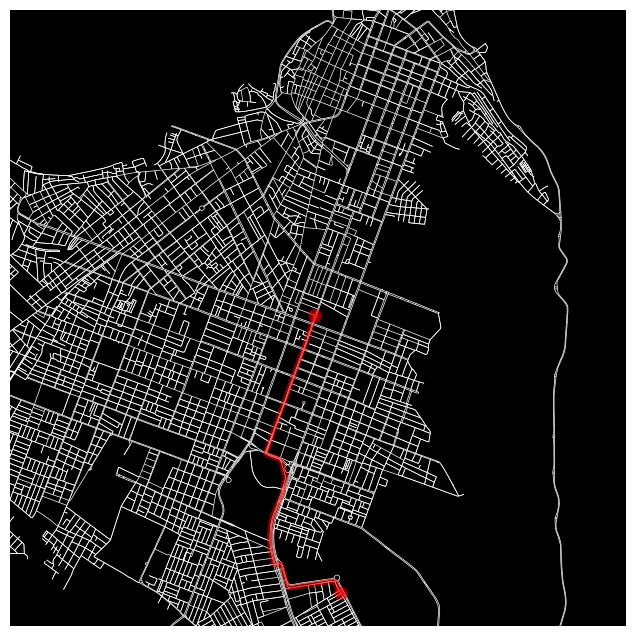

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

# Cidade
cidade = "Natal, Brazil"

# Extraia a rede de ruas de Natal
G = ox.graph_from_place(cidade, network_type="drive")

# Coordenadas do Midway
midway_coords = (-5.8111, -35.2075)

# Calcule o bounding box (área de visualização) ao redor desse ponto central
north, south, east, west = ox.utils_geo.bbox_from_point(midway_coords, dist=3500)  # Ajuste a distância conforme necessário

# Plote a rede com o bounding box (zoom)
fig, ax = ox.plot_graph(
    G,
    bbox=(north, south, east, west),  # Define a área a ser exibida
    node_size=0,                      # Ajuste o tamanho dos nós
    bgcolor='black',                  # Fundo branco para melhor contraste
    edge_color='white',               # Cor das ruas
    edge_linewidth=0.5,               # Espessura das ruas
    show=False
)
# Coordenadas UFRN
ufrn_coords = (-5.8394, -35.2050)

# Encontre os nós mais próximos dessas coordenadas na rede viária
midway_node = ox.nearest_nodes(G, midway_coords[1], midway_coords[0])
ufrn_node = ox.nearest_nodes(G, ufrn_coords[1], ufrn_coords[0])

# Calcule o caminho mais curto (distância) entre os nós
shortest_path = nx.shortest_path(G, midway_node, ufrn_node, weight='length')

# Plote o caminho
fig, ax = ox.plot_graph_route(G, shortest_path,
                              ax=ax, # Plotar mesmo eixo do mapa
                              route_color='red',
                              route_linewidth=4
                              )


plt.show()

2° Caminho mais longo do Midway ate UFRN


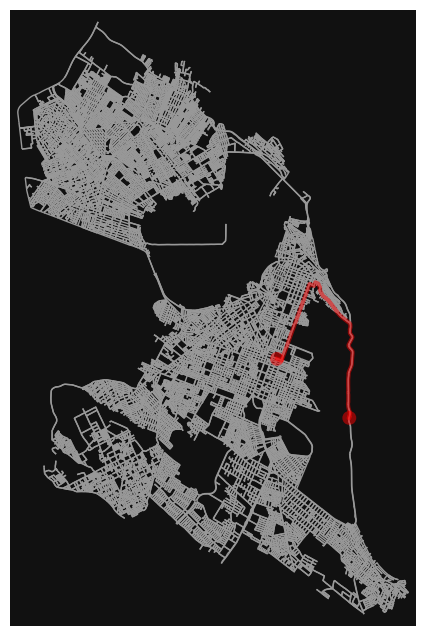

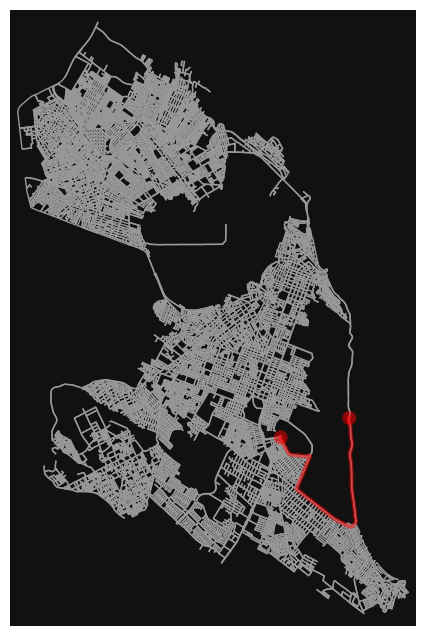

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Baixar o grafo da cidade de Natal
G = ox.graph_from_place('Natal, Brazil', network_type='drive')

# Definir pontos (Midway e Via Costeira)
midway_location = ox.geocode("Midway Mall, Natal, Brazil")
distancia = 2000
via_costeira_location = ox.geocode("Via Costeira, Natal, Brazil")
ufrn_location = ox.geocode("UFRN, Natal, Brazil")

# Encontrar nós mais próximos
midway_node = ox.distance.nearest_nodes(G, X=midway_location[1], Y=midway_location[0])
via_costeira_node = ox.distance.nearest_nodes(G, X=via_costeira_location[1], Y=via_costeira_location[0])
ufrn_node = ox.distance.nearest_nodes(G, X=ufrn_location[1], Y=ufrn_location[0])

# Encontrar o caminho mais curto (usando 'length' como peso para distância)
shortest_route = nx.shortest_path(G, midway_node, via_costeira_node, weight='length')
shortest_route_2 = nx.shortest_path(G, via_costeira_node, ufrn_node, weight='length')

# Plotar o grafo com o caminho destacado
fig, ax = ox.plot_graph_route(G, shortest_route, route_color='red', route_linewidth=3, node_size=0)
fig, ax = ox.plot_graph_route(G, shortest_route_2, route_color='red', route_linewidth=3, node_size=0)
# Calcule o bounding box
north, south, east, west = ox.utils_geo.bbox_from_point(
    (midway_location[0], midway_location[1]), dist=distancia
)

# Plote o grafo com zoom na área definida
fig, ax = ox.plot_graph_route(
    G,
    shortest_route,
    ax=ax,
    route_color='red',
    route_linewidth=3,
    node_size=0,
    bbox=(north, south, east, west)  # Define o zoom
)

plt.show()